# Explore Dataset 1 

In [4]:
import pandas as pd

df = pd.read_csv('data/synthetic_dataset_1.csv')
df.head()

,x,y
0,5.148627,14.803275
1,5.154684,13.794985
2,5.860064,12.347434
3,3.893184,13.698427
4,4.605271,14.574962


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [6]:
df.describe()

,x,y
count,500.000000,500.000000
mean,5.769981,9.872688
std,4.026429,4.353071
min,-1.825632,0.037997
25%,1.892219,8.380279
50%,5.582833,10.882269
75%,9.602335,13.206384
max,13.294568,16.980884


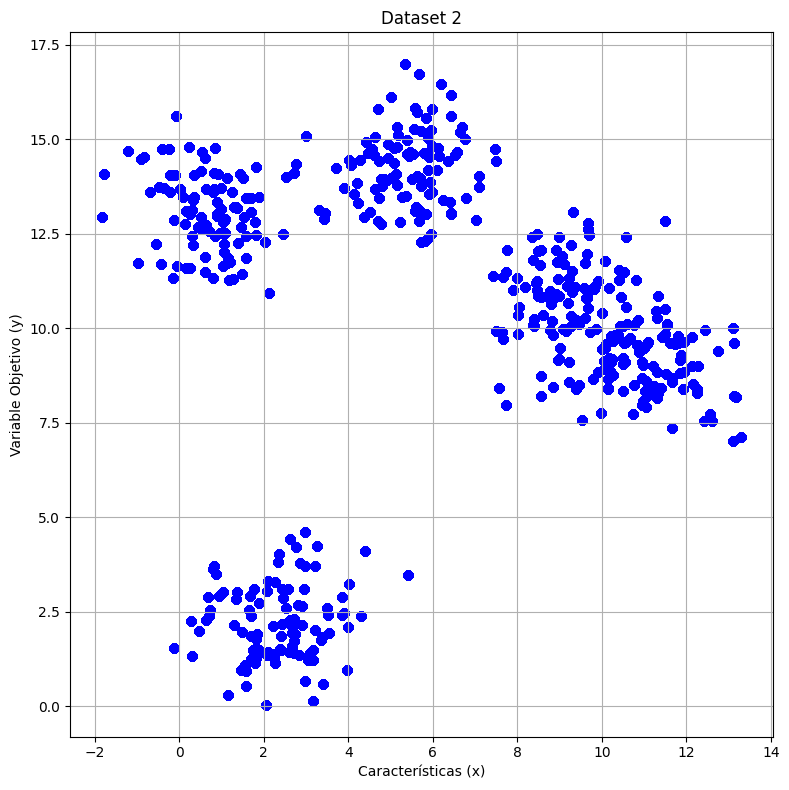

In [7]:
import matplotlib.pyplot as plt

x = df["x"]
y = df["y"]

fig , ax = plt.subplots(figsize=(8, 8))

for i in range(x.shape[0]):
    ax.scatter(x, y, color='blue', alpha=0.5)
    ax.set_title(f'Dataset 2')
    ax.set_xlabel('Características (x)')
    ax.set_ylabel('Variable Objetivo (y)')
    ax.grid(True)
plt.tight_layout()
plt.show()

# Entrenamiento de Kmeans para Dataset 1

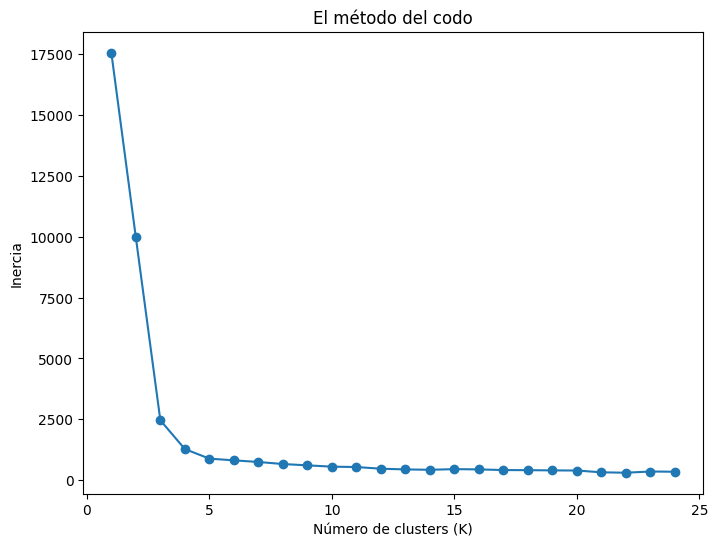

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from k_means import KMeans
from sklearn.preprocessing import StandardScaler

data1 = pd.read_csv("data/synthetic_dataset_1.csv")
X = data1.values

inertias = []
num_k_test = 25
for k in range(1, num_k_test):
    kmeans = KMeans(k=k, seed=42)
    labels = kmeans.fit(X)
    inertia = kmeans._compute_inertia(X, labels)
    inertias.append(inertia)

plt.figure(figsize=(8, 6))
plt.plot(range(1, num_k_test), inertias, marker='o')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inercia')
plt.title('El método del codo')
plt.show()

- El k óptimo para el Dataset 1 es: 4

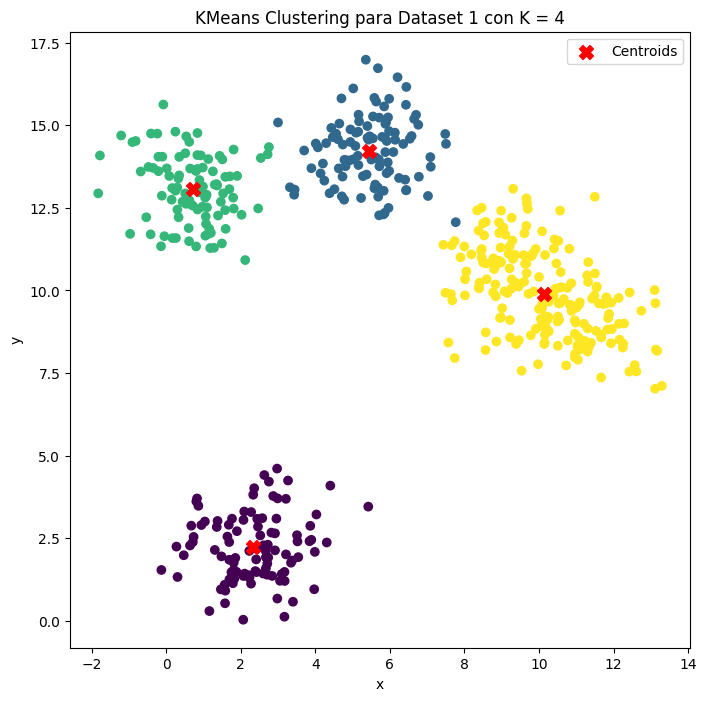

In [9]:
optimal_k = 4

kmeans_optimal = KMeans(k=optimal_k, seed=42)
labels_optimal = kmeans_optimal.fit(X)

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels_optimal, cmap='viridis')

plt.scatter(kmeans_optimal.centroids[:, 0], kmeans_optimal.centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'KMeans Clustering para Dataset 1 con K = {optimal_k}')
plt.legend()
plt.show()

# Explore Dataset 2

In [10]:
import pandas as pd

df = pd.read_csv('data/synthetic_dataset_2.csv')
df.head()

,x,y
0,4.132114,-3.709932
1,-2.029252,4.188049
2,4.472504,-1.442930
3,5.007609,0.381537
4,-2.588096,-4.367870


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       3000 non-null   float64
 1   y       3000 non-null   float64
dtypes: float64(2)
memory usage: 47.0 KB


In [12]:
df.describe()

,x,y
count,3000.000000,3000.000000
mean,0.024205,-0.024831
std,4.673576,4.704056
min,-8.676415,-8.632679
25%,-4.380625,-4.367761
50%,0.037837,-0.053041
75%,4.343155,4.303324
max,8.606222,8.519641


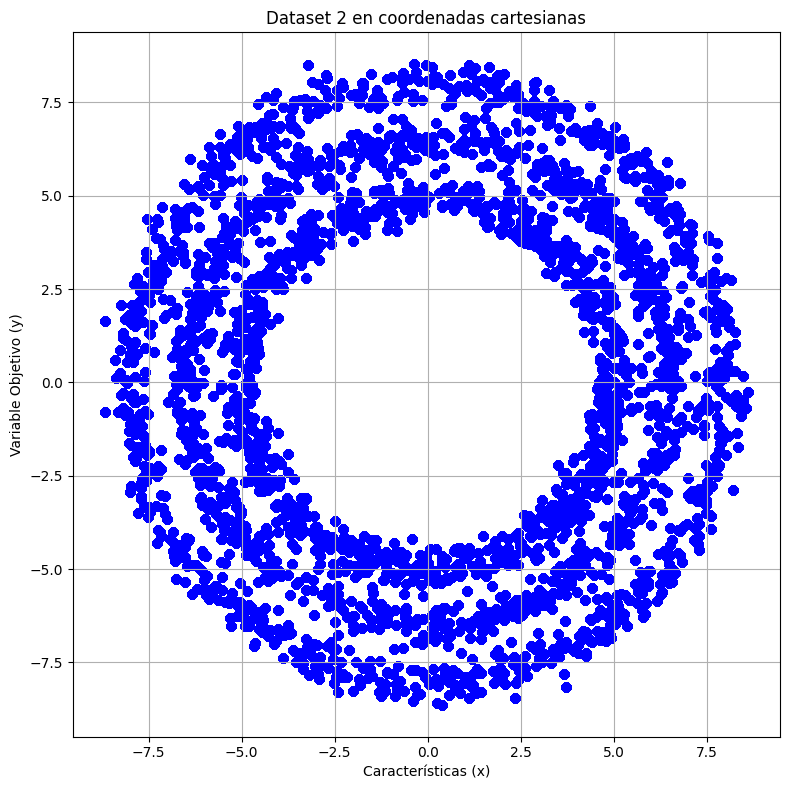

In [13]:
df = pd.read_csv('data/synthetic_dataset_2.csv')
x = df["x"]
y = df["y"]

fig , ax = plt.subplots(figsize=(8, 8))

for i in range(x.shape[0]):
    ax.scatter(x, y, color='blue', alpha=0.5)
    ax.set_title(f'Dataset 2 en coordenadas cartesianas')
    ax.set_xlabel('Características (x)')
    ax.set_ylabel('Variable Objetivo (y)')
    ax.grid(True)
plt.tight_layout()
plt.show()

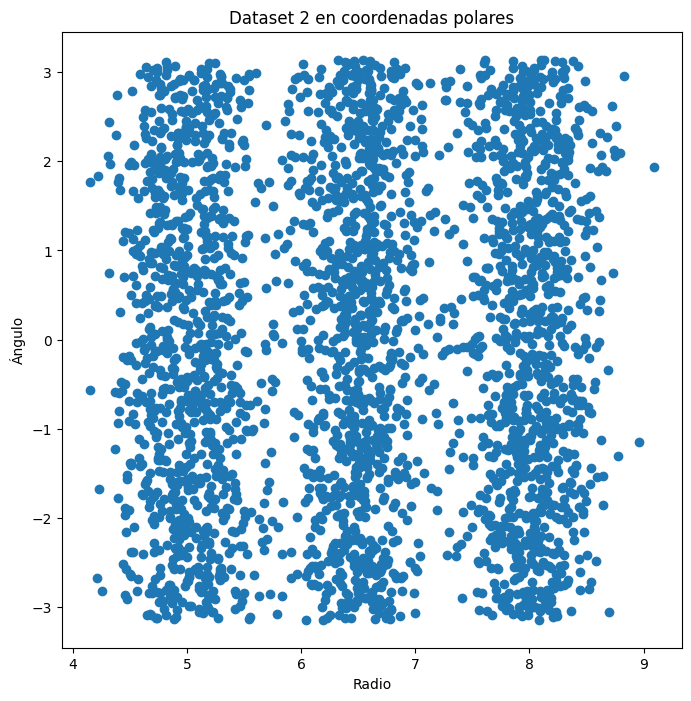

In [14]:
data1 = pd.read_csv("data/synthetic_dataset_2.csv")
X = data1.values

r = np.sqrt(X[:, 0]**2 + X[:, 1]**2)
theta = np.arctan2(X[:, 1], X[:, 0])
X_polar = np.column_stack((r, theta))

plt.figure(figsize=(8, 8))
plt.scatter(X_polar[:, 0], X_polar[:, 1])
plt.title('Dataset 2 en coordenadas polares')
plt.xlabel('Radio')
plt.ylabel('Ángulo')
plt.show()

# Entrenamiento de Kmeans para Dataset 2

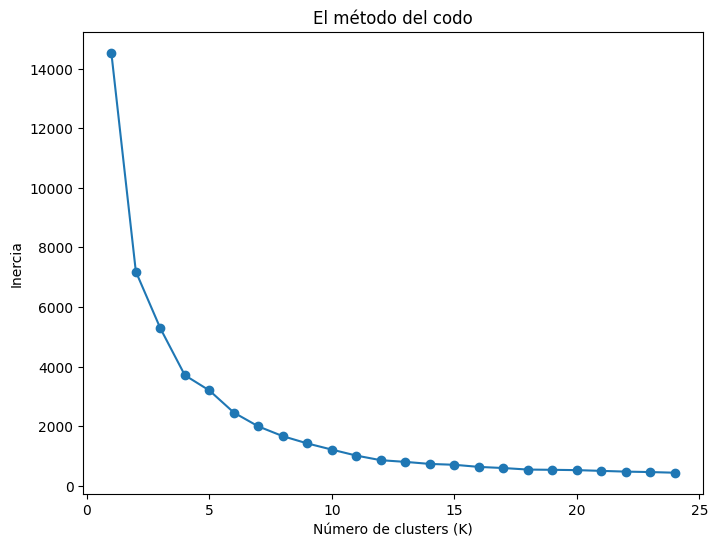

In [15]:
inertias = []
num_k_test = 25
for k in range(1, num_k_test):
    kmeans = KMeans(k = k, seed = 42)
    labels = kmeans.fit(X_polar)
    inertia = kmeans._compute_inertia(X_polar, labels)
    inertias.append(inertia)

plt.figure(figsize=(8, 6))
plt.plot(range(1, num_k_test), inertias, marker='o')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inercia')
plt.title('El método del codo')
plt.show()

- El k óptimo para el Dataset 2 es: 3

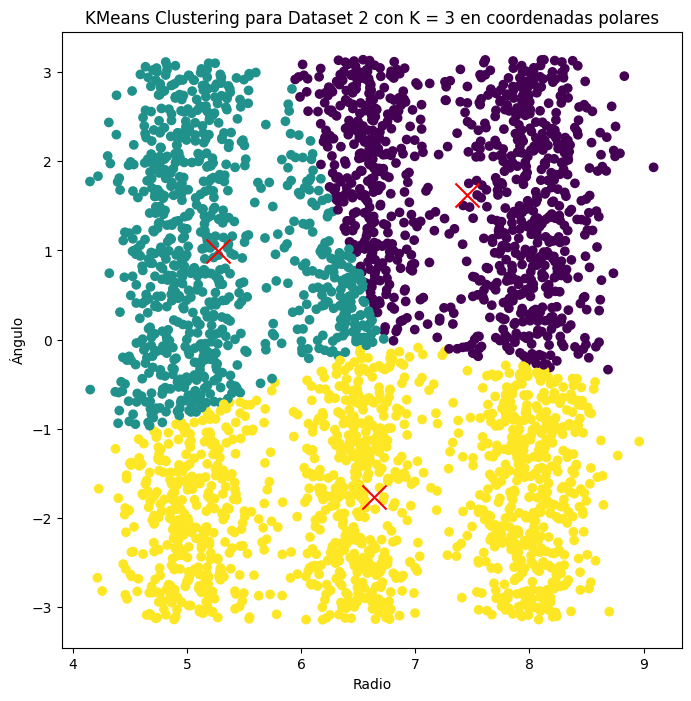

In [16]:
optimal_k = 3
kmeans = KMeans(k=optimal_k, seed=42)
labels = kmeans.fit(X_polar)

centroids_polar = kmeans.centroids
centroids_cartesian = np.column_stack((centroids_polar[:, 0] * np.cos(centroids_polar[:, 1]),
                                       centroids_polar[:, 0] * np.sin(centroids_polar[:, 1])))

plt.figure(figsize=(8, 8))
plt.scatter(X_polar[:, 0], X_polar[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s = 300, c='red', marker='x')
plt.title(f'KMeans Clustering para Dataset 2 con K = {optimal_k} en coordenadas polares')
plt.xlabel('Radio')
plt.ylabel('Ángulo')
plt.show()

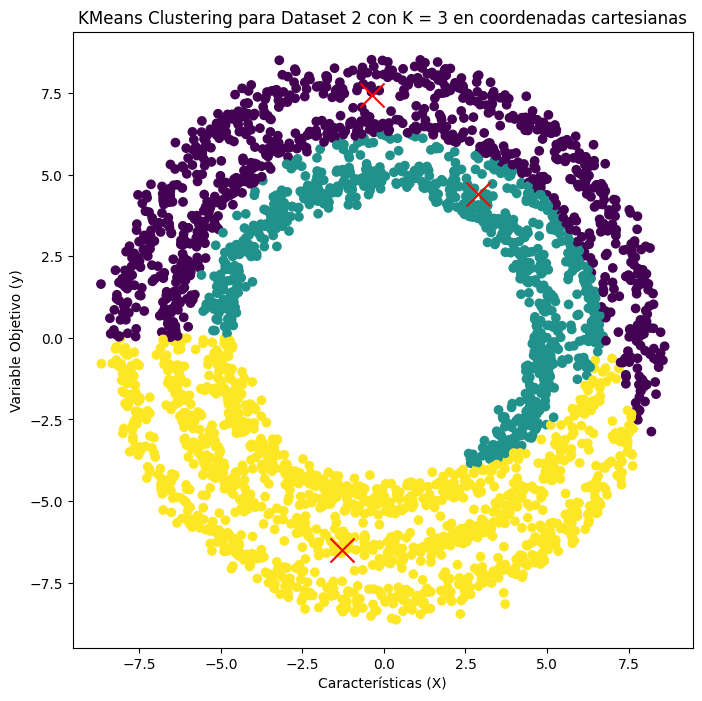

In [17]:
X_cartesian = np.column_stack((X_polar[:, 0] * np.cos(X_polar[:, 1]),
                               X_polar[:, 0] * np.sin(X_polar[:, 1])))

plt.figure(figsize=(8, 8))
plt.scatter(X_cartesian[:, 0], X_cartesian[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids_cartesian[:, 0], centroids_cartesian[:, 1], s=300, c='red', marker='x')
plt.title(f'KMeans Clustering para Dataset 2 con K = {optimal_k} en coordenadas cartesianas')
plt.xlabel('Características (X)')
plt.ylabel('Variable Objetivo (y)')
plt.show()

Vemos que esta implementación no anda para este conjunto de datos. A continuación probamos si anda con DBSCAN.

# Implementación DBSCAN 

# Dataset 1

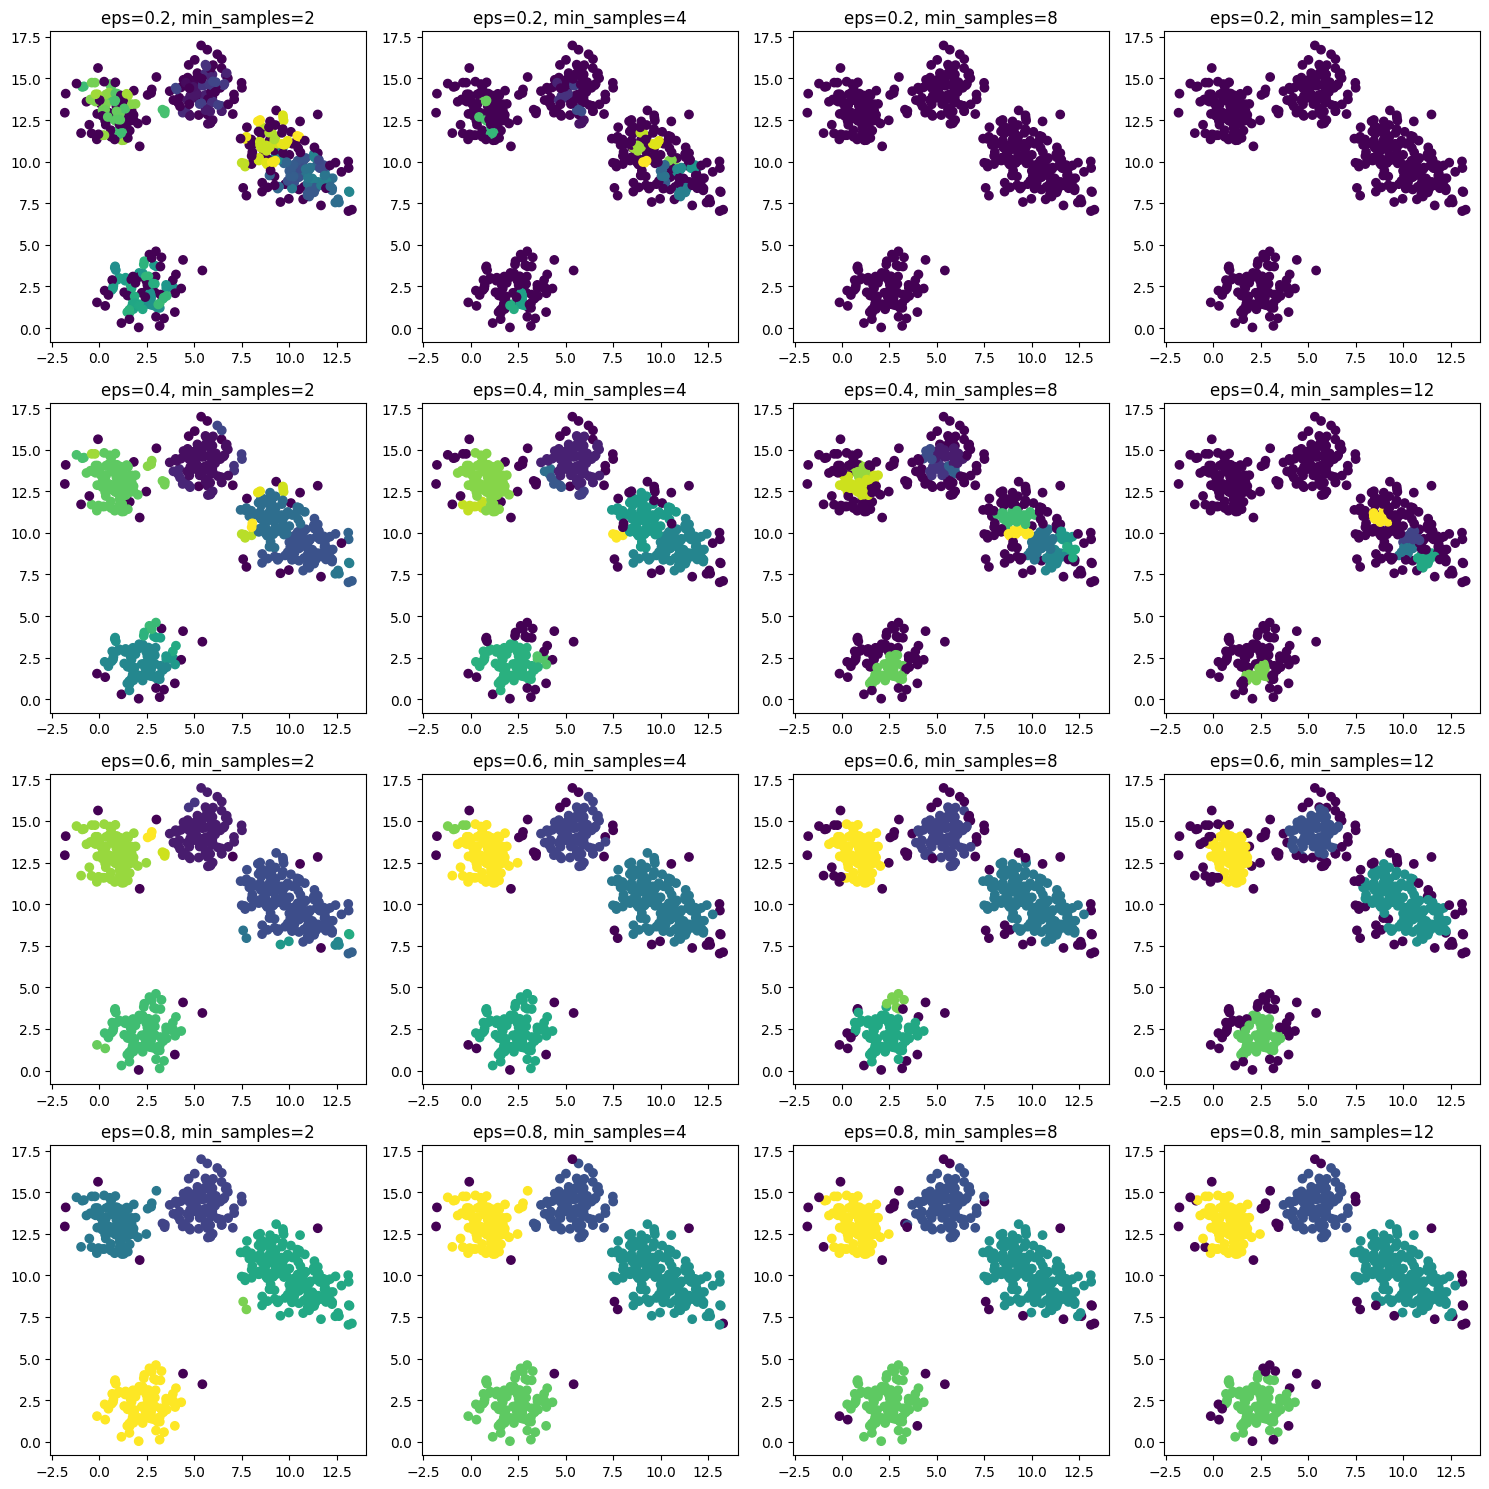

In [14]:
from sklearn.cluster import DBSCAN

data1 = pd.read_csv("data/synthetic_dataset_1.csv")
X1 = data1.values

from sklearn.cluster import DBSCAN

data1 = pd.read_csv("data/synthetic_dataset_1.csv")
X1 = data1.values

# Definir rangos de valores para eps y min_samples
eps_values = [0.2, 0.4, 0.6, 0.8]
min_samples_values = [2, 4, 8, 12]

# Iterar sobre diferentes valores de eps y min_samples
plt.figure(figsize=(15, 15))
subplot_index = 1
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels2 = dbscan.fit_predict(X1)
        
        plt.subplot(len(eps_values), len(min_samples_values), subplot_index)
        plt.scatter(X1[:, 0], X1[:, 1], c=dbscan_labels2, cmap='viridis')
        plt.title(f'eps={eps}, min_samples={min_samples}')
        
        subplot_index += 1

plt.tight_layout()
plt.show()

El mejor set de parámetros para el Dataset 2 es: eps = 0.8 y min_samples = 2.

# Dataset 2

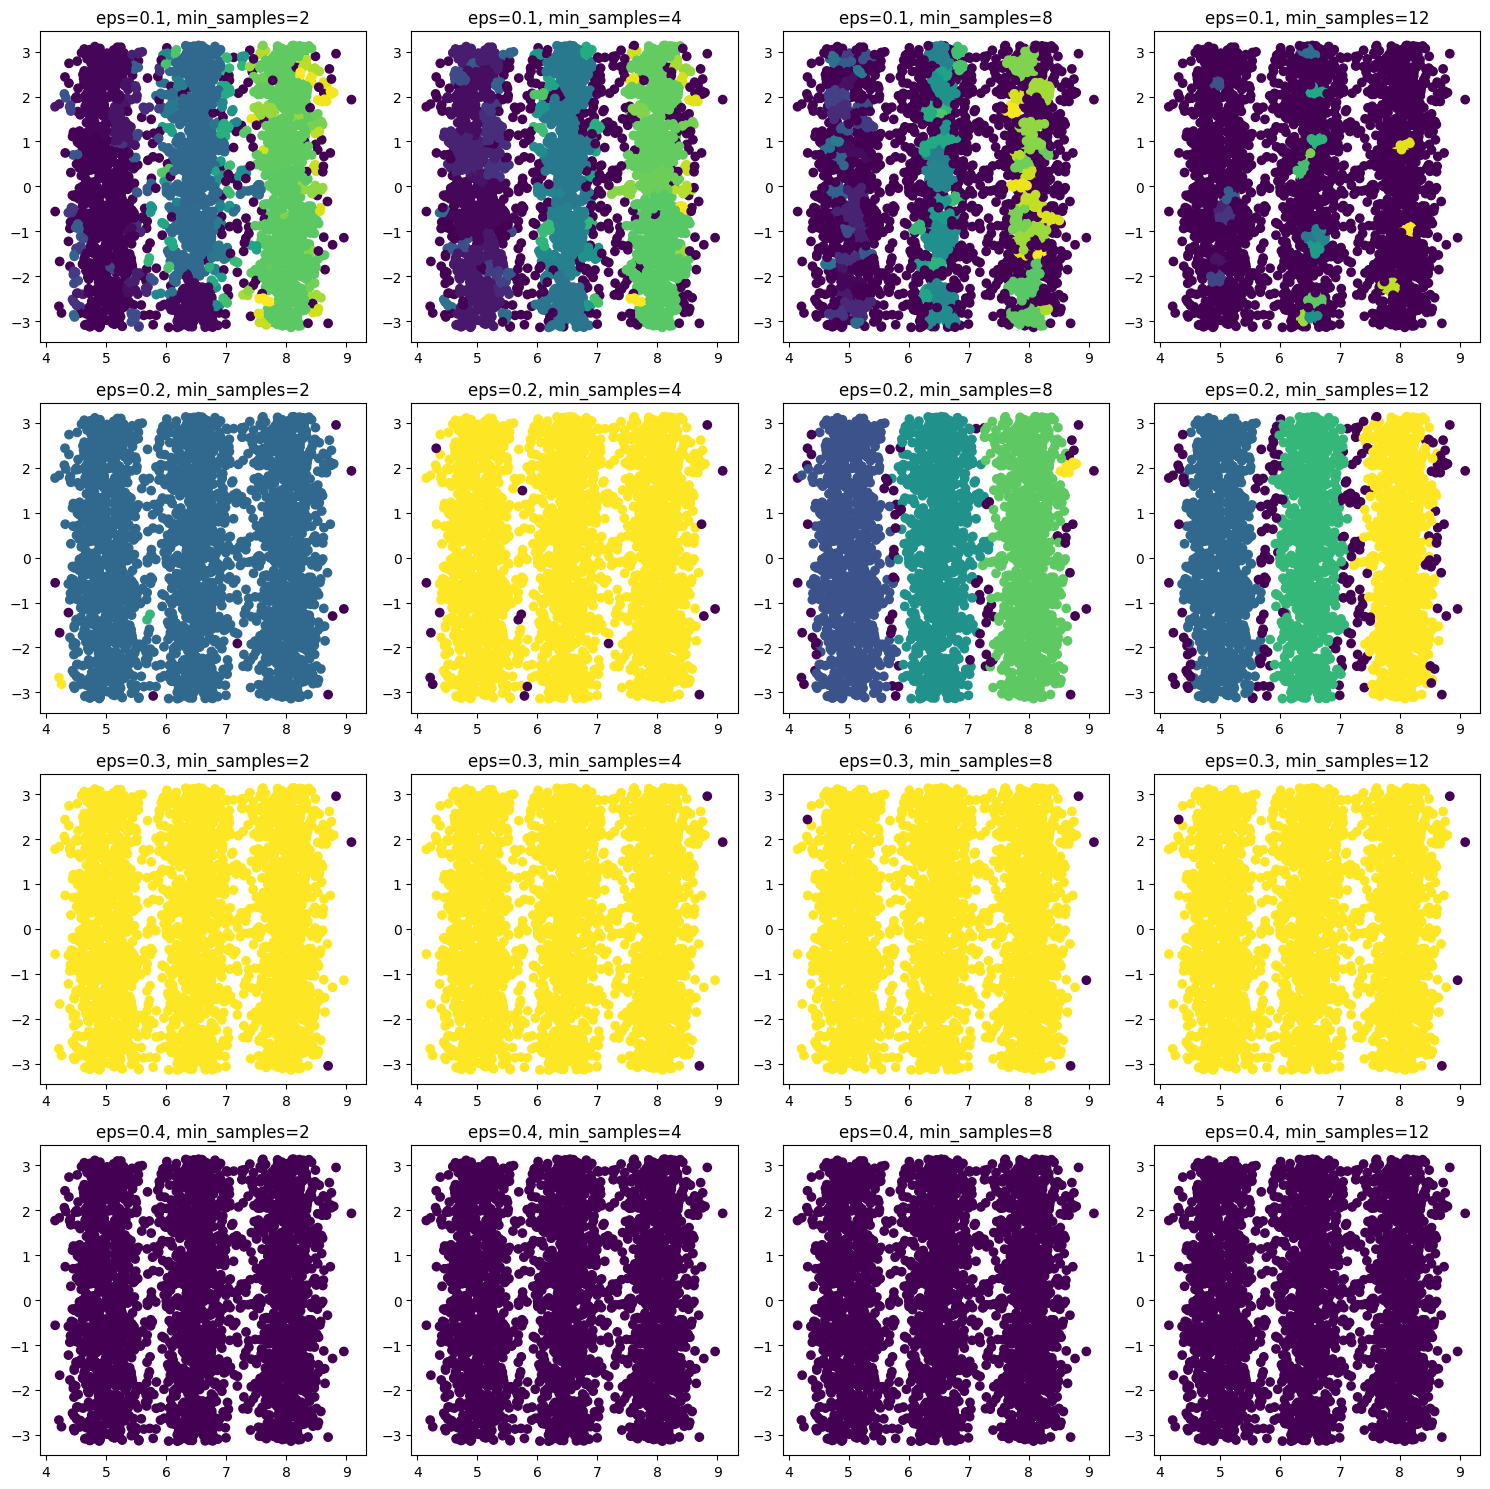

In [11]:
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data2 = pd.read_csv("data/synthetic_dataset_2.csv")
X2 = data2.values

r = np.sqrt(X2[:, 0]**2 + X2[:, 1]**2)
theta = np.arctan2(X2[:, 1], X2[:, 0])
X2_polar = np.column_stack((r, theta))

eps_values = [0.1, 0.2, 0.3, 0.4]
min_samples_values = [2, 4, 8, 12]

plt.figure(figsize=(15, 15))
subplot_index = 1
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels2 = dbscan.fit_predict(X2_polar)
        
        plt.subplot(len(eps_values), len(min_samples_values), subplot_index)
        plt.scatter(X2_polar[:, 0], X2_polar[:, 1], c=dbscan_labels2, cmap='viridis')
        plt.title(f'eps={eps}, min_samples={min_samples}')
        
        subplot_index += 1

plt.tight_layout()
plt.show()

El mejor set de parámetros para el Dataset 2 es: eps = 0.2 y min_samples = 12.

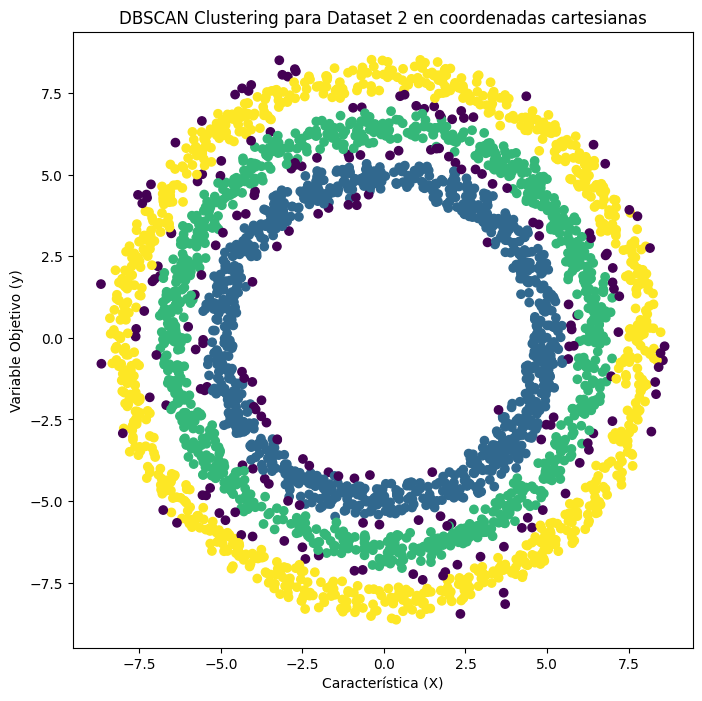

In [12]:
dbscan = DBSCAN(eps=0.2, min_samples=12)
dbscan_labels2 = dbscan.fit_predict(X2_polar)

X2_cartesian = np.column_stack((X2_polar[:, 0] * np.cos(X2_polar[:, 1]),
                                X2_polar[:, 0] * np.sin(X2_polar[:, 1])))

plt.figure(figsize=(8, 8))
plt.scatter(X2_cartesian[:, 0], X2_cartesian[:, 1], c = dbscan_labels2, cmap='viridis')
plt.title('DBSCAN Clustering para Dataset 2 en coordenadas cartesianas')
plt.xlabel('Característica (X)')
plt.ylabel('Variable Objetivo (y)')
plt.show()